<a href="https://colab.research.google.com/github/hadeelfarash/Prediction_of_Product_Sales/blob/main/copy_of_resampling_datetime_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import pandas and change max columns
import pandas as pd
from datetime import date, time, datetime
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_columns',100)
# Load in the data from Google drive, set the index, and preview first 5 rows
fpath="/content/drive/MyDrive/CodingDojo/04-DataViz/Week13/Data/london_weather_MODIFIED - london_weather_MODIFIED (1).csv"
df = pd.read_csv(fpath)
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [ ]:
#Add a datetime column based on the string in the "date" column
df['datetime'] = pd.to_datetime(df['date'],format='%Y%m%d')

df=df.set_index('datetime')
df
# filtered_data = df[(df['datetime'].dt.year >= 2000) & (df['datetime'].dt.year <= 2010)]
# filtered_data


,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
datetime,,,,,,,,,,
1979-01-01,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01-03,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
1979-01-04,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
1979-01-05,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...,...
2020-12-27,20201227,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
2020-12-28,20201228,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
2020-12-29,20201229,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15341 entries, 1979-01-01 to 2020-12-31
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       14938 non-null  float64
 2   sunshine          14957 non-null  float64
 3   global_radiation  14939 non-null  float64
 4   max_temp          14951 non-null  float64
 5   mean_temp         14922 non-null  float64
 6   min_temp          14955 non-null  float64
 7   precipitation     14951 non-null  float64
 8   pressure          14953 non-null  float64
 9   snow_depth        13589 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.3 MB


## Keep only data from the year 2000 or later.

In [ ]:
import pandas as pd
# Filter data for the year 2000 or later
filtered_data = df[df.index.year >= 2000]

# Keep only the required features
required_features = ['precipitation', 'mean_temp', 'min_temp', 'max_temp', 'snow_depth']
filtered_data = filtered_data[required_features]
filtered_data

,precipitation,mean_temp,min_temp,max_temp,snow_depth
datetime,,,,,
2000-01-01,0.0,7.0,4.9,10.8,0.0
2000-01-02,0.2,7.9,5.0,11.5,0.0
2000-01-03,6.0,9.4,7.2,9.5,0.0
2000-01-04,0.2,7.0,4.4,11.0,0.0
2000-01-05,0.8,6.4,1.9,10.8,0.0
...,...,...,...,...,...
2020-12-27,2.0,7.5,7.6,7.5,NaN
2020-12-28,0.2,1.1,-1.3,3.6,NaN
2020-12-29,0.0,2.6,1.1,4.1,NaN


##Impute any missing values

In [ ]:
filtered_data.isna().sum()


precipitation     390
mean_temp         419
min_temp          386
max_temp          390
snow_depth       1752
dtype: int64

In [ ]:
filtered_data['precipitation'] = pd.to_numeric(filtered_data['precipitation'], errors='coerce')  # Convert to numeric if needed
filtered_data['precipitation'] = filtered_data['precipitation'].bfill()

filtered_data['mean_temp'] = pd.to_numeric(filtered_data['mean_temp'], errors='coerce')  # Convert to numeric if needed
filtered_data['mean_temp'] = filtered_data['mean_temp'].bfill()

filtered_data['min_temp'] = pd.to_numeric(filtered_data['min_temp'], errors='coerce')  # Convert to numeric if needed
filtered_data['min_temp'] = filtered_data['min_temp'].bfill()

filtered_data['max_temp'] = pd.to_numeric(filtered_data['max_temp'], errors='coerce')  # Convert to numeric if needed
filtered_data['max_temp'] = filtered_data['max_temp'].bfill()

filtered_data['snow_depth'] = pd.to_numeric(filtered_data['snow_depth'], errors='coerce')  # Convert to numeric if needed
filtered_data['snow_depth'] = filtered_data['snow_depth'].ffill()


filtered_data.isna().sum()

precipitation    0
mean_temp        0
min_temp         0
max_temp         0
snow_depth       0
dtype: int64

##Part 2) Answer the Questions with Visualizations (Using the Correct Frequency)

**Q1: What month had the most precipitation between 2000 through 2010?**:

---



In [ ]:
import pandas as pd
Q1=filtered_data.copy()
# Filter data for the years 2000 through 2010
Q1 = Q1[(Q1.index.year >= 2000) & (Q1.index.year <= 2010)]

# Group by month and calculate total precipitation for each month
monthly_precipitation = Q1.groupby(Q1.index.month)['precipitation'].sum()

# Find the month with the maximum precipitation
month_with_most_precipitation = monthly_precipitation.idxmax()

# Print the month with the most precipitation
print(f"The month with the most precipitation between 2000 and 2010 is: {month_with_most_precipitation}")



The month with the most precipitation between 2000 and 2010 is: 11


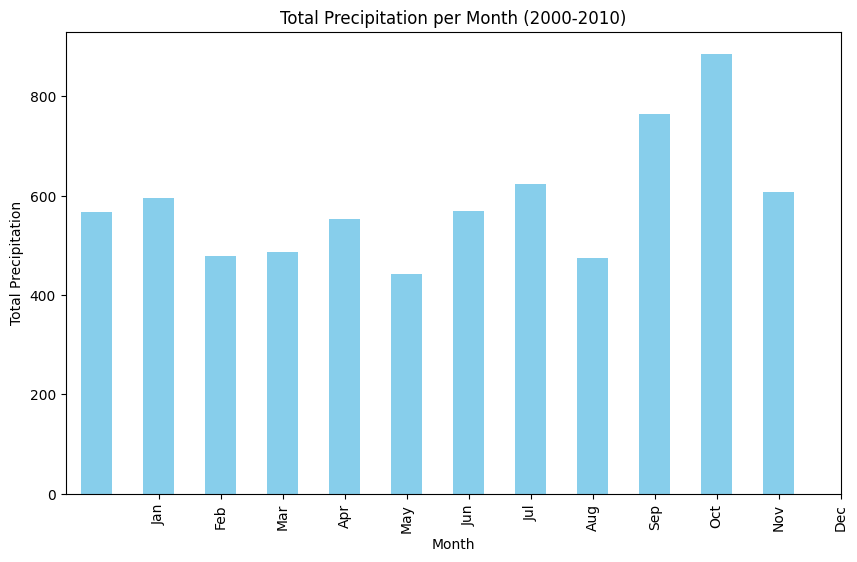

In [ ]:
# Plotting the monthly precipitation
plt.figure(figsize=(10, 6))
monthly_precipitation.plot(kind='bar', color='skyblue')
plt.xlabel('Month')
plt.ylabel('Total Precipitation')
plt.title('Total Precipitation per Month (2000-2010)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

##Q2: Which year between 2000-2020 had the coolest average temperature?

In [ ]:
import pandas as pd

Q2=filtered_data.copy()

Q2 = Q2[(Q2.index.year >= 2000) & (Q2.index.year <= 2020)]



# Group by year and calculate the average temperature for each year
yearly_average_temp = Q2.groupby(Q2.index.year)['mean_temp'].mean()

# Find the year with the coolest average temperature
coolest_year = yearly_average_temp.idxmin()
coolest_year_avg_temp = yearly_average_temp.min()

print(f"The year with the coolest average temperature between 2000 and 2020 was {coolest_year} with an average temperature of {coolest_year_avg_temp:.2f} degrees")


The year with the coolest average temperature between 2000 and 2020 was 2010 with an average temperature of 10.65 degrees


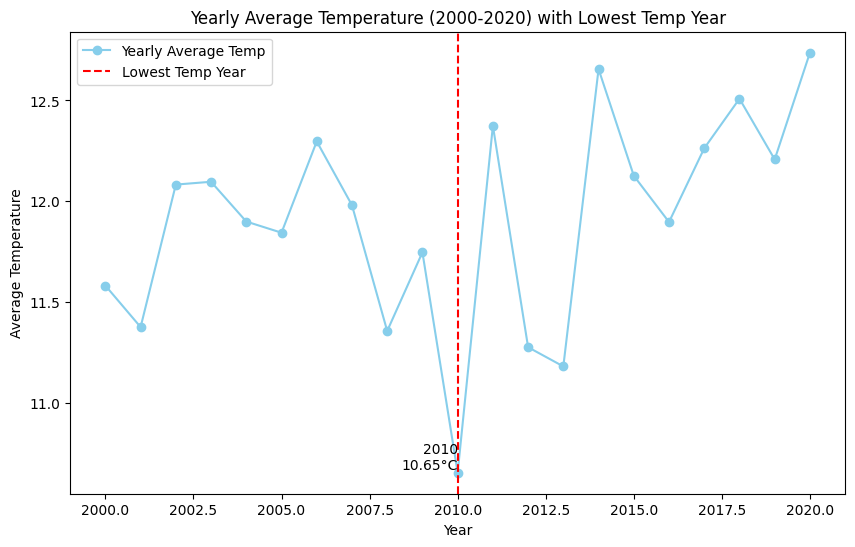

In [ ]:
# Find the year with the lowest mean temperature
lowest_temp_year = yearly_average_temp.idxmin()
lowest_temp_value = yearly_average_temp.min()

# Plotting the yearly average temperature
plt.figure(figsize=(10, 6))
yearly_average_temp.plot(marker='o', color='skyblue', label='Yearly Average Temp')
plt.axvline(x=lowest_temp_year, color='red', linestyle='--', label='Lowest Temp Year')
plt.text(lowest_temp_year, lowest_temp_value, f'{lowest_temp_year}\n{lowest_temp_value:.2f}°C', color='black', ha='right', va='bottom')
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.title('Yearly Average Temperature (2000-2020) with Lowest Temp Year')
plt.legend()
plt.show()